In [26]:
search_patterns=[r'\bfemale\b|\b(F\d{2})\b',r'\bmale\b|\b(M\d{2})\b',
                 r'\bfirst\-?\s?time\b|\bfirst trip\b|\bfirst solo\b',r'\bexperienced\b|\bpro\b|\bexpert\b']
total_count=[]
for p in search_patterns:
    res=find_words(p,post_df['post_text'])
    total_count.append(res)
print(total_count)

[72, 29, 158, 69]


In [27]:
keywords=['female','male','first solo','experienced solo']
count_words=pd.DataFrame({'Word':keywords,'count':total_count})

In [28]:
count_words

,Word,count
0,female,72
1,male,29
2,first solo,158
3,experienced solo,69


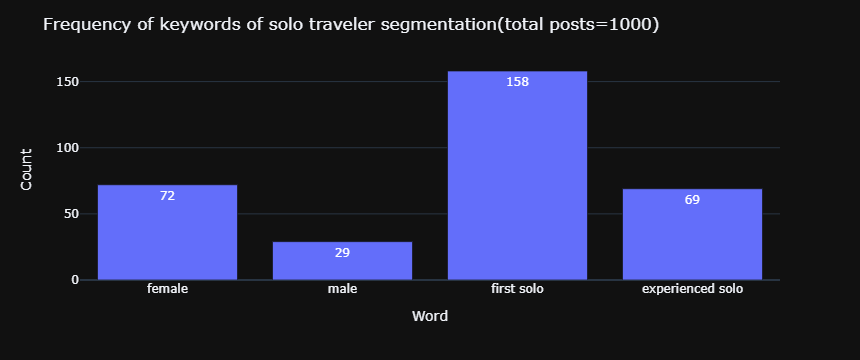

In [53]:


fig = px.bar(
    count_words,
    x="Word",
    y="count",
    labels={"count": "Count", "Word": "Word "},text_auto=True,
    
    template="plotly_dark"
).update_yaxes(
    categoryorder="total ascending",
)

fig.update_layout(
    title="Frequency of keywords of solo traveler segmentation(total posts=1000)",
    
)
fig

In [30]:
#find top topic keywords

## Female Solo Travelers

In [31]:

# Fill NaN values with an empty string
post_df['post_text'] = post_df['post_text'].fillna('')

female_df = post_df.loc[post_df['post_text'].str.contains(r'\bFemale\b|\bfemale\b|\b(F)\b', case=False)]

female_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10792\2073754846.py:4: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,post_id,post_title,post_text,post_url,post_score,post_num_comments,post_upvote_ratio,post_created_utc,created_date,created_year
1,9qyu4g,How to shake someone at a hostel?,I’m travelling solo for the first time in Japa...,https://www.reddit.com/r/solotravel/comments/9...,8296,138,0.95,1.540381e+09,2018-10-24 18:37:13,2018
6,dhfz8w,Afraid to go back to my hostel room,I (f 22) am solo traveling around Europe and h...,https://www.reddit.com/r/solotravel/comments/d...,4636,291,0.98,1.570998e+09,2019-10-14 03:22:10,2019
18,sl2g5z,Drugged and robbed in Turkey - Sharing my expe...,I’m a solo female traveler and fortunate to ha...,https://www.reddit.com/r/solotravel/comments/s...,2534,435,0.98,1.644051e+09,2022-02-05 15:48:15,2022
31,146y8eu,The first time I have ever felt unsafe in SE A...,I just had a complete scare. Im still shaking ...,https://www.reddit.com/r/solotravel/comments/1...,1924,233,0.95,1.686501e+09,2023-06-11 23:27:22,2023
68,ab7aij,"Female solo travelers are FINE, GUYS.",I promise this isn’t a direct response to the ...,https://www.reddit.com/r/solotravel/comments/a...,1377,342,0.86,1.546264e+09,2018-12-31 20:53:18,2018


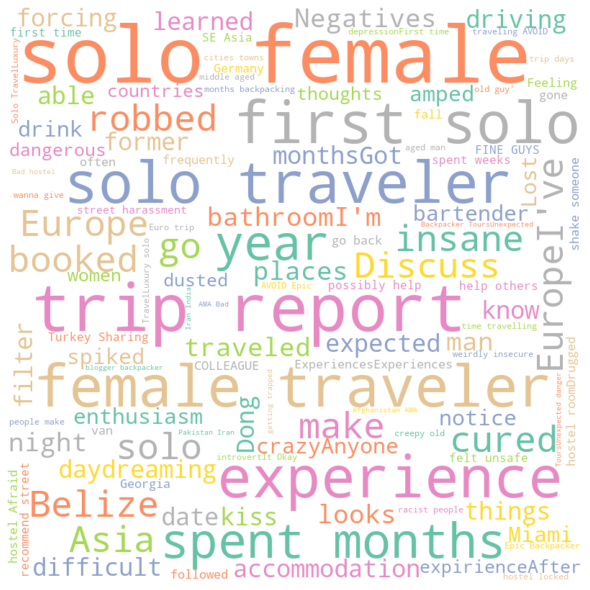

In [32]:
#create text
text="".join(str(p) for p in female_df['post_title'])
#generate word cloud:
text_cloud = generate_wordcloud(text)

In [33]:
#first_time female solo travelers
solo_female=find_words(r'\bfirst\-?\s?time\b|\bfirst trip\b|\bfirst solo\b|\binexperienced\b',female_df['post_text'])
print(solo_female)
                       

17


In [34]:
# find most destinations
female_des=find_destination(female_df['post_text'])
female_map_des=pd.DataFrame({'Des':female_des})                           

In [35]:
# crate a data for destination and its code
female_map_des['fe_code']=female_map_des['Des'].apply(lambda x: code_finding(x))
female_map_des.head()

,Des,fe_code
0,Afghanistan,AFG
1,Albania,ALB
2,Armenia,ARM
3,Australia,AUS
4,Austria,AUT


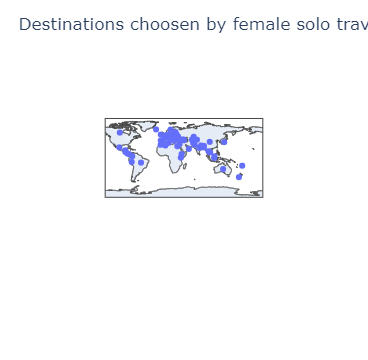

In [36]:
# map destinations for female travelers
fig=px.scatter_geo(female_map_des, locations='fe_code',hover_name='Des')
fig.update_layout(title="Destinations choosen by female solo travellers")
fig.show()


In [50]:
search_patterns=female_map_des['Des']
total_count=[]
for p in search_patterns:
    res=find_words(p,female_df['post_text'])
    total_count.append(res)
print(total_count)

[3, 10, 1, 17, 3, 3, 2, 9, 1, 4, 2, 1, 7, 5, 6, 2, 2, 4, 7, 1, 1, 10, 2, 1, 9, 8, 9, 4, 9, 4, 6, 44, 2, 10, 1, 9, 18, 1, 5, 1, 3, 2, 9, 6, 7, 1, 2, 4, 1, 6, 3, 3, 2, 25, 6, 2, 1, 5, 7, 4, 2, 1, 4, 5, 10, 8, 10, 7, 1, 1, 2]


In [51]:
female_map_des['count_country']=total_count
female_map_des.head()

,Des,fe_code,count_country
0,Afghanistan,AFG,3
1,Albania,ALB,10
2,Armenia,ARM,1
3,Australia,AUS,17
4,Austria,AUT,3


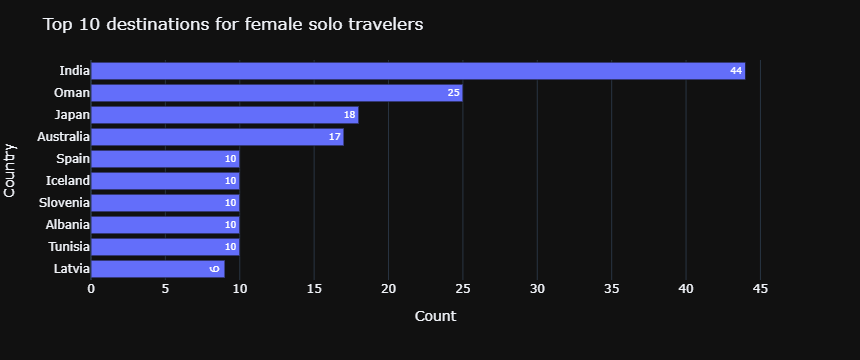

In [52]:
# top 10 destinations for solo travelers
top_10_f=female_map_des.sort_values(by='count_country', ascending=False)[:10]
top_10_f.reset_index()

fig = px.bar(
    top_10_f,
    x="count_country",
    y="Des",
    labels={"count_country": "Count", "Des": "Country "},text_auto=True,
    orientation='h',
    template="plotly_dark"
).update_yaxes(
    categoryorder="total ascending",
)

fig.update_layout(
    title="Top 10 destinations for female solo travelers",
    
)
fig


In [37]:
# Ages of female solo travelers
def search_ages(search_pat,text_col):
    ages=[]
    pattern=re.compile(search_pat,re.IGNORECASE)
    for text in text_col:
        match=pattern.search(text)
        if match:
            ages.append(match.group(1))
    return ages
        

In [38]:
search_pats=[r'(\d{2})\s(years old|years-old|year old)',r'F\s?(\d{2})']

res_list=[]
for search_pat in search_pats:
    res=search_ages(search_pat,female_df['post_text'])
    res_list.extend(res)
print(res_list)    

['20', '21', '20', '46', '22', '26', '21', '26', '18', '22', '11', '15', '35', '32', '49', '25', '20']
